In [712]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [713]:
# Define reward matrices
baseline_reward_matrix = np.array([[3, 1], [3, 0]])
in_group_reward_matrix = np.array([[4, 1], [3, 0]])
out_group_reward_matrix = np.array([[7, 1], [5, 0]])

In [714]:
# Define agent class and simulation function
class Agent:
    def __init__(self, group, coop_prob):
        self.group = group
        self.coop_prob = coop_prob
        self.total_reward = 0

In [715]:
def select_pairs(agents):
    pairs = []
    available_agents = list(agents)  # Convert set to list
    
    while len(pairs) < len(agents) // 2 and len(available_agents) >= 2:
        agent1, agent2 = random.sample(available_agents, 2)
        if agent1 != agent2:  # Ensure the same agent isn't paired with itself
            pairs.append((agent1, agent2))
            available_agents.remove(agent1)
            available_agents.remove(agent2)
    
    return pairs

def simulate(agents, reward_matrix, iterations=100, in_group_prob=0.7, out_group_prob=0.3):
    for _ in range(iterations):
        pairs = select_pairs(agents)
        for agent1, agent2 in pairs:
            if agent1.group == agent2.group:
                current_reward_matrix = in_group_reward_matrix
                agent1_cooperates = np.random.rand() < in_group_prob
                agent2_cooperates = np.random.rand() < in_group_prob
            elif agent1.group == 'none' and agent2.group == 'none':
                current_reward_matrix = baseline_reward_matrix
                agent1_cooperates = np.random.rand() < 0.5
                agent2_cooperates = np.random.rand() < 0.5
            else:
                current_reward_matrix = out_group_reward_matrix
                agent1_cooperates = np.random.rand() < out_group_prob
                agent2_cooperates = np.random.rand() < out_group_prob
            
            if agent1_cooperates and agent2_cooperates:
                reward = current_reward_matrix[0, 0]  # both cooperate
            elif agent1_cooperates and not agent2_cooperates:
                reward = current_reward_matrix[0, 1]  # agent1 cooperates, agent2 does not
            elif not agent1_cooperates and agent2_cooperates:
                reward = current_reward_matrix[1, 0]  # agent1 does not cooperate, agent2 cooperates
            else:
                reward = current_reward_matrix[1, 1]  # both do not cooperate
            
            agent1.total_reward += reward
            agent2.total_reward += reward

In [716]:
# Create agents for each condition
agents_baseline = [Agent(group='none', coop_prob=0.5) for _ in range(30)]
agents_compare = [Agent(group='in_group', coop_prob=0.7) for _ in range(15)] + [Agent(group='out_group', coop_prob=0.3) for _ in range(15)]
agents_in_group = [Agent(group='in_group', coop_prob=0.7) for _ in range(15)] + [Agent(group='out_group', coop_prob=0.3) for _ in range(15)]
agents_out_group = [Agent(group='out_group', coop_prob=0.7) for _ in range(15)] + [Agent(group='in_group', coop_prob=0.3) for _ in range(15)]

# Run simulations
simulate(agents_baseline, baseline_reward_matrix)
simulate(agents_compare, in_group_reward_matrix, in_group_prob=0.7, out_group_prob=0.3)
simulate(agents_in_group, in_group_reward_matrix, in_group_prob=0.7, out_group_prob=0.3)
simulate(agents_out_group, out_group_reward_matrix, in_group_prob=0.7, out_group_prob=0.3)

# Collect results
baseline_rewards = [agent.total_reward for agent in agents_baseline]
baseline_compare = [agent.total_reward for agent in agents_compare]
in_group_rewards = [agent.total_reward for agent in agents_in_group]
out_group_rewards = [agent.total_reward for agent in agents_out_group]

In [717]:
results_df = pd.DataFrame({
    'Baseline': baseline_rewards,
    'Comparison': baseline_compare,
    'In-group': in_group_rewards,
    'Out-group': out_group_rewards
})

# Display the DataFrame
print("Simulation Results")
print(results_df.describe())

Simulation Results
         Baseline  Comparison    In-group   Out-group
count   30.000000   30.000000   30.000000   30.000000
mean   277.666667  237.000000  242.533333  233.866667
std     16.867298   15.997845   23.088635   15.092207
min    242.000000  208.000000  188.000000  197.000000
25%    267.000000  223.500000  228.000000  227.000000
50%    278.500000  239.500000  241.500000  233.000000
75%    288.750000  249.250000  258.250000  244.750000
max    313.000000  262.000000  296.000000  268.000000
    Baseline  Comparison  In-group  Out-group
0        267         240       275        247
1        285         253       222        251
2        293         220       241        197
3        284         250       296        231
4        271         241       197        241
5        275         214       188        216
6        248         256       238        235
7        274         215       244        233
8        242         210       256        242
9        291         247       239 

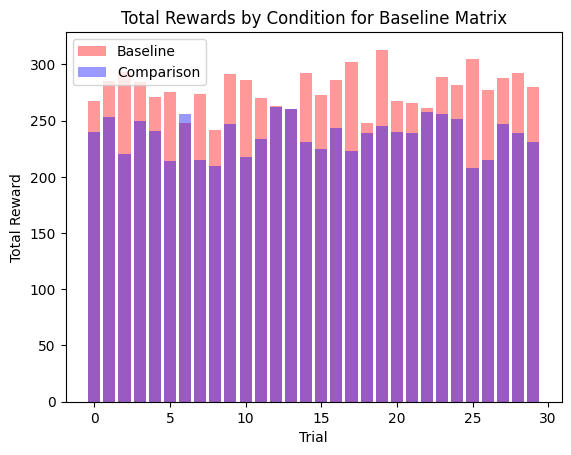

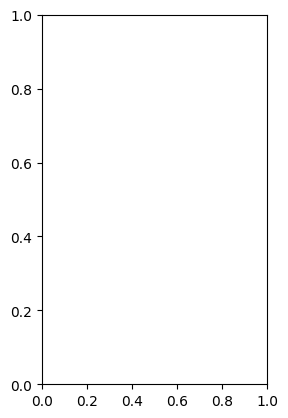

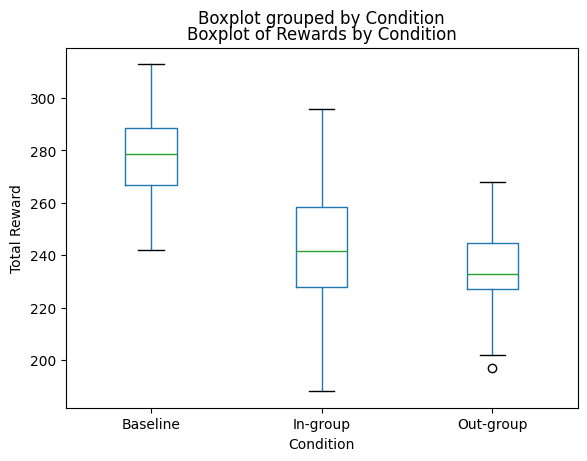

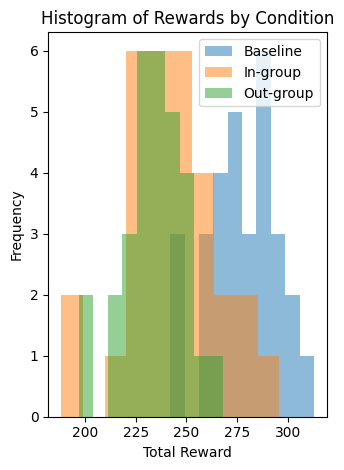

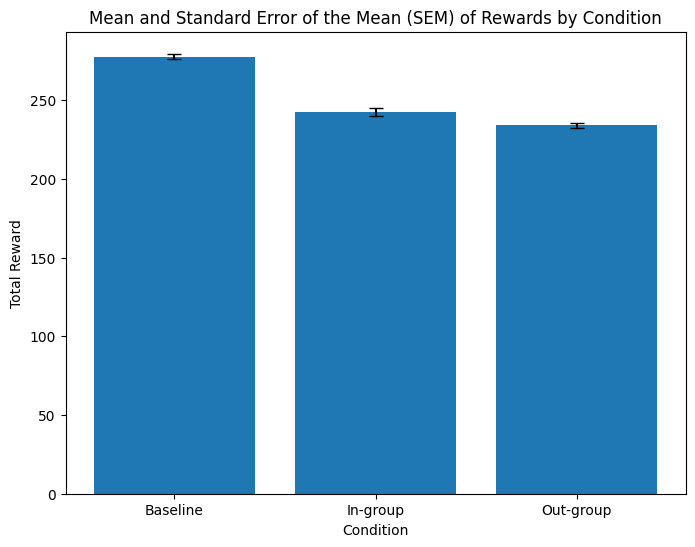

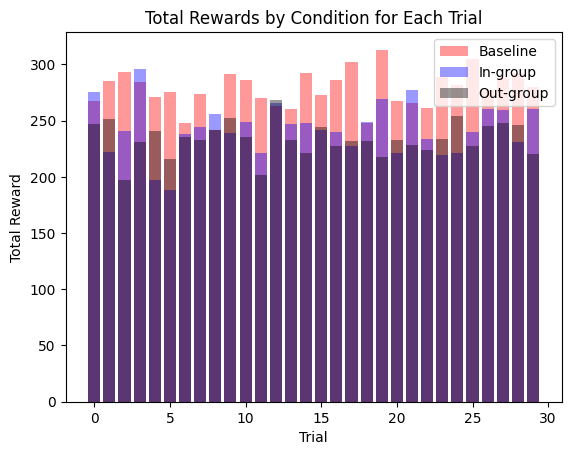

In [718]:
# Create a DataFrame for plotting
df = pd.DataFrame({
    'Condition': ['Baseline'] * len(baseline_rewards) + ['In-group'] * len(in_group_rewards) + ['Out-group'] * len(out_group_rewards),
    'Reward': baseline_rewards + in_group_rewards + out_group_rewards
})

baseline_df = pd.DataFrame({
    'Condition': ['Baseline'] * len(baseline_rewards) + ['Comparison'] * len(baseline_compare),
    'Reward': baseline_rewards + baseline_compare
})

colors = ['red', 'blue', 'black']
# Compare Baseline to its Comparison, Total Reward
for i, condition in enumerate(['Baseline', 'Comparison']):
    subset = baseline_df[baseline_df['Condition'] == condition]
    plt.bar(range(len(subset)), subset['Reward'], label=condition, color=colors[i], alpha=0.4)

plt.title('Total Rewards by Condition for Baseline Matrix')
plt.xlabel('Trial')
plt.ylabel('Total Reward')
plt.legend()
plt.show()

# Boxplot
plt.subplot(1, 2, 1)
df.boxplot(column='Reward', by='Condition', grid=False)
plt.title('Boxplot of Rewards by Condition')
plt.xlabel('Condition')
plt.ylabel('Total Reward')
plt.show()

colors = ['red', 'blue', 'black']
# Histogram
plt.subplot(1, 2, 2)
for condition in df['Condition'].unique():
    subset = df[df['Condition'] == condition]
    plt.hist(subset['Reward'], alpha=0.5, label=condition, bins=10)

plt.title('Histogram of Rewards by Condition')
plt.xlabel('Total Reward')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Mean and standard deviation bar plot
summary_stats = df.groupby('Condition')['Reward'].agg(['mean', 'std']).reset_index()
# use standard error of the mean for error bars
summary_stats['sem'] = summary_stats['std'] / np.sqrt(len(df))

plt.figure(figsize=(8, 6))
plt.bar(summary_stats['Condition'], summary_stats['mean'], yerr=summary_stats['sem'], capsize=5)
plt.title('Mean and Standard Error of the Mean (SEM) of Rewards by Condition')
plt.xlabel('Condition')
plt.ylabel('Total Reward')
plt.show()

# Bar graph for each trial
conditions = df['Condition'].unique()
colors = ['red', 'blue', 'black']

# Bar graph for each trial
for i, condition in enumerate(conditions):
    subset = df[df['Condition'] == condition]
    plt.bar(range(len(subset)), subset['Reward'], label=condition, color=colors[i], alpha=0.4)

plt.title('Total Rewards by Condition for Each Trial')
plt.xlabel('Trial')
plt.ylabel('Total Reward')
plt.legend()
plt.show()

In [719]:
# Q LEARNING
class Agent:
    def __init__(self, group, coop_prob=0.5, learning_rate=0.1, discount_factor=0.95):
        self.group = group
        self.coop_prob = coop_prob
        self.total_reward = 0
        self.total_in_group_reward = 0
        self.total_out_group_reward = 0
        self.q_values = {'cooperate': 0, 'not_cooperate': 0}
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.in_group_interactions = 0
        self.out_group_interactions = 0

    def choose_action(self):
        # Choose action based on Q-values
        if self.q_values['cooperate'] > self.q_values['not_cooperate']:
            return 'cooperate'
        elif self.q_values['cooperate'] < self.q_values['not_cooperate']:
            return 'not_cooperate'
        else:
            # If equal, choose randomly based on initial coop_prob
            return 'cooperate' if np.random.rand() < self.coop_prob else 'not_cooperate'
    
    def update_q_values(self, action, reward, next_max_q):
        # Update Q-values using the Q-learning formula
        self.q_values[action] += self.learning_rate * (reward + self.discount_factor * next_max_q - self.q_values[action])

def select_pairs(agents):
    pairs = []
    available_agents = list(agents)
    
    while len(pairs) < len(agents) // 2 and len(available_agents) >= 2:
        agent1, agent2 = random.sample(available_agents, 2)
        pairs.append((agent1, agent2))
        available_agents.remove(agent1)
        available_agents.remove(agent2)
    
    return pairs

def simulate(agents, reward_matrix, iterations=100, in_group_prob=0.7, out_group_prob=0.3):
    for _ in range(iterations):
        pairs = select_pairs(agents)
        for agent1, agent2 in pairs:
            action1 = agent1.choose_action()
            action2 = agent2.choose_action()

            if agent1.group == agent2.group:
                current_reward_matrix = in_group_reward_matrix
                agent1.in_group_interactions += 1
                agent2.in_group_interactions += 1
                reward = current_reward_matrix[0,0]
                agent1.total_in_group_reward += reward
                agent2.total_in_group_reward += reward
            elif agent1.group == 'none' and agent2.group == 'none':
                current_reward_matrix = baseline_reward_matrix
            else:
                current_reward_matrix = out_group_reward_matrix
                agent1.out_group_interactions += 1
                agent2.out_group_interactions += 1
                reward = current_reward_matrix[0, 0] 
                agent1.total_out_group_reward += reward
                agent2.total_out_group_reward += reward

            if action1 == 'cooperate' and action2 == 'cooperate':
                reward = current_reward_matrix[0, 0]  # both cooperate
            elif action1 == 'cooperate' and action2 == 'not_cooperate':
                reward = current_reward_matrix[0, 1]  # agent1 cooperates, agent2 does not
            elif action1 == 'not_cooperate' and action2 == 'cooperate':
                reward = current_reward_matrix[1, 0]  # agent1 does not cooperate, agent2 cooperates
            else:
                reward = current_reward_matrix[1, 1]  # both do not cooperate
            
            agent1.total_reward += reward
            agent2.total_reward += reward

            # Update Q-values
            next_max_q1 = max(agent1.q_values.values())
            next_max_q2 = max(agent2.q_values.values())
            agent1.update_q_values(action1, reward, next_max_q1)
            agent2.update_q_values(action2, reward, next_max_q2)

# Create agents for each condition
agents_baseline = [Agent(group='none', coop_prob=0.5) for _ in range(30)]
agents_in_group = [Agent(group='in_group', coop_prob=0.7) for _ in range(15)] + [Agent(group='out_group', coop_prob=0.3) for _ in range(15)]
agents_out_group = [Agent(group='out_group', coop_prob=0.7) for _ in range(15)] + [Agent(group='in_group', coop_prob=0.3) for _ in range(15)]

# Run simulations
simulate(agents_baseline, baseline_reward_matrix)
simulate(agents_in_group, in_group_reward_matrix, in_group_prob=0.7, out_group_prob=0.3)
simulate(agents_out_group, out_group_reward_matrix, in_group_prob=0.7, out_group_prob=0.3)

# Collect results
baseline_rewards = [agent.total_reward for agent in agents_baseline]
# in_group_rewards = [agent.total_reward for agent in agents_in_group]
# out_group_rewards = [agent.total_reward for agent in agents_out_group]
in_group_rewards = [agent.total_in_group_reward for agent in agents_in_group]
out_group_rewards = [agent.total_out_group_reward for agent in agents_out_group]


# Create DataFrame for analysis
results_df = pd.DataFrame({
    'Baseline': baseline_rewards,
    'In-group': in_group_rewards,
    'Out-group': out_group_rewards
})

# Display the DataFrame
print("Simulation Results")
print(results_df.describe())

# checking interaction counts
in_group_in_group_interactions = [agent.in_group_interactions for agent in agents_in_group]
in_group_out_group_interactions = [agent.out_group_interactions for agent in agents_in_group]
out_group_in_group_interactions = [agent.in_group_interactions for agent in agents_out_group]
out_group_out_group_interactions = [agent.out_group_interactions for agent in agents_out_group]

print("In-group condition in-group interactions:", in_group_in_group_interactions)
print("In-group condition out-group interactions:", in_group_out_group_interactions)
print("Out-group condition in-group interactions:", out_group_in_group_interactions)
print("Out-group condition out-group interactions:", out_group_out_group_interactions)

Simulation Results
         Baseline    In-group   Out-group
count   30.000000   30.000000   30.000000
mean   225.466667  341.866667  339.333333
std    100.680695  130.221756  137.559851
min     77.000000  152.000000  130.000000
25%    118.250000  192.500000  182.000000
50%    300.500000  415.000000  416.500000
75%    309.750000  438.750000  436.250000
max    329.000000  504.000000  500.000000
    Baseline  In-group  Out-group
0        108       438        414
1        307       164        437
2        114       423        407
3         77       403        434
4        321       395        403
5        328       432        419
6        127       441        421
7        300       182        421
8        309       435        138
9        329       439        439
10        95       167        428
11       316       446        405
12       301       418        425
13       116       412        131
14       311       391        464
15       145       195        179
16       125       202   

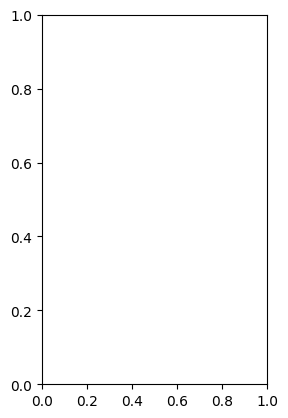

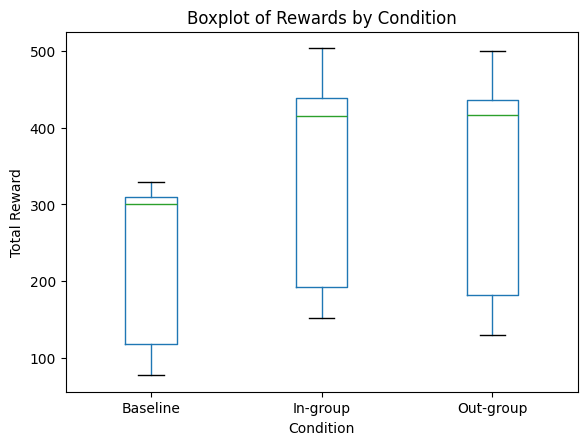

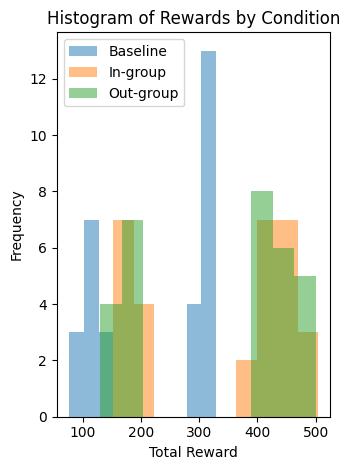

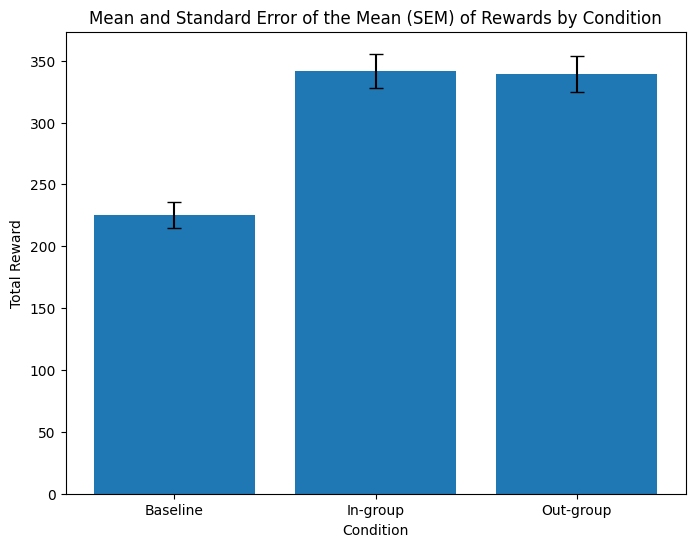

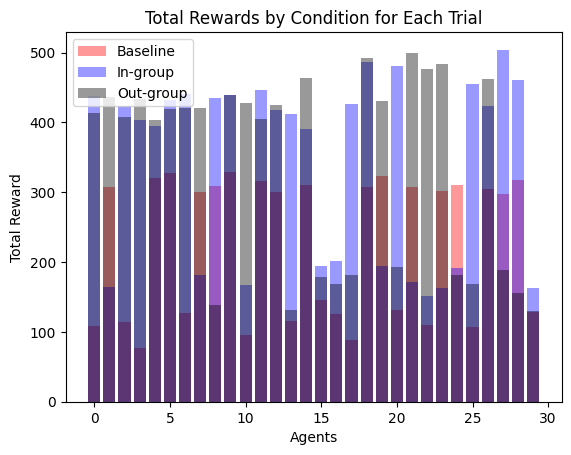

In [720]:
# Create a DataFrame for plotting
df = pd.DataFrame({
    'Condition': ['Baseline'] * len(baseline_rewards) + ['In-group'] * len(in_group_rewards) + ['Out-group'] * len(out_group_rewards),
    'Reward': baseline_rewards + in_group_rewards + out_group_rewards
})

# Boxplot
plt.subplot(1, 2, 1)
df.boxplot(column='Reward', by='Condition', grid=False)
plt.title('Boxplot of Rewards by Condition')
plt.suptitle('')
plt.xlabel('Condition')
plt.ylabel('Total Reward')
plt.show()

# Histogram
plt.subplot(1, 2, 2)
for condition in df['Condition'].unique():
    subset = df[df['Condition'] == condition]
    plt.hist(subset['Reward'], alpha=0.5, label=condition, bins=10)

plt.title('Histogram of Rewards by Condition')
plt.xlabel('Total Reward')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Mean and standard deviation bar plot
summary_stats = df.groupby('Condition')['Reward'].agg(['mean', 'std']).reset_index()
# use standard error of the mean for error bars
summary_stats['sem'] = summary_stats['std'] / np.sqrt(len(df))

plt.figure(figsize=(8, 6))
plt.bar(summary_stats['Condition'], summary_stats['mean'], yerr=summary_stats['sem'], capsize=5)
plt.title('Mean and Standard Error of the Mean (SEM) of Rewards by Condition')
plt.xlabel('Condition')
plt.ylabel('Total Reward')
plt.show()

# Bar graph for each trial
conditions = df['Condition'].unique()
colors = ['red', 'blue', 'black']

for i, condition in enumerate(conditions):
    subset = df[df['Condition'] == condition]
    plt.bar(range(len(subset)), subset['Reward'], label=condition, color=colors[i], alpha=0.4)

plt.title('Total Rewards by Condition for Each Trial')
plt.xlabel('Agents')
plt.ylabel('Total Reward')
plt.legend()
plt.show()

In [722]:
# Statistical Significance Analysis

baseline_rewards = [225.466667, 100.680695]
in_group_rewards = [341.866667, 130.22175]
out_group_rewards = [339.333333, 137.559851]

# one-way ANOVA
f_statistic, p_value = f_oneway(baseline_rewards, in_group_rewards, out_group_rewards)

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 0.21788289080945755
P-Value: 0.8159180804250973
